# **Linear Regression**

In this Colab you will use a real dataset to train a model to predict the fare of a taxi ride in Chicago, Illinois.

*Learning Objectives*

*   Read a .csv file into a pandas DataFrame.

*   Explore a dataset with Python visualization libraries.

*   Experiment with different features to build a linear regression model.

*   Tune the model's hyperparameters.

*   Compare training runs using root mean squared error and loss curves.



# Part 1

1. Load the required modules

In [19]:
import io

import numpy as np
import pandas as pd

import keras

import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

2.Load the dataset

In [2]:
chicago_taxi_dataset = pd.read_csv('/content/chicago_taxi_train.csv')


3.Update the dataframe

In [3]:
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]
print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Part 2  : Data set Exploration

# View dataset statistics

A large part of most machine learning projects is getting to know your data. In this step, you will use the DataFrame.describe method to view descriptive statistics about the dataset and answer some important questions about the data.

**Instructions**

1. Run the View dataset statistics code cell.

2. Inspect the output and answer these questions:

      What is the maximum fare?

      What is the mean distance across all trips?

      How many cab companies are in the dataset?

      What is the most frequent payment type?

      Are any features missing data?



In [4]:
#Run the View dataset statistics code cell
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [5]:
#What is the maximum fare?
max_value = training_df['FARE'].max()
print(max_value)


159.25


In [6]:
#0R
max_fare = training_df['FARE'].max()
print("What is the maximum fare? \t\t\t\tAnswer: ${fare:.2f}".format(fare = max_fare))


What is the maximum fare? 				Answer: $159.25


In [7]:
# What is the mean distance across all trips?
mean_value = training_df['TRIP_MILES'].mean()
print(mean_value)

8.289462674323214


In [8]:
#or
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? \t\tAnswer: {mean:.4f} miles".format(mean = mean_distance))

What is the mean distance across all trips? 		Answer: 8.2895 miles


In [9]:
# How many cab companies are in the dataset?
training_df['COMPANY'].nunique()

31

In [10]:
#or
num_companies = training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? \t\tAnswer: {num}".format(num = num_companies))

How many cab companies are in the dataset? 		Answer: 31


In [11]:
# What is the most frequent payment type?
training_df['PAYMENT_TYPE'].value_counts()



,count
PAYMENT_TYPE,
Credit Card,14142
Cash,8770
Mobile,4041
Prcard,3504
Unknown,1206
No Charge,16
Dispute,15


In [29]:
#or
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? \t\tAnswer: {payment}".format(payment = most_freq_payment_type))

What is the most frequent payment type? 		Answer: Credit Card


In [32]:
# Are any features missing data?
training_df.isnull().sum()

,0
TRIP_MILES,0
TRIP_SECONDS,0
FARE,0
COMPANY,0
PAYMENT_TYPE,0
TIP_RATE,0


In [33]:
#or
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

Are any features missing data? 				Answer: No


# Generate a correlation matrix

An important part of machine learning is determining which features correlate with the label. If you have ever taken a taxi ride before, your experience is probably telling you that the fare is typically associated with the distance traveled and the duration of the trip. But, is there a way for you to learn more about how well these features correlate to the fare (label)?

In this step, you will use a correlation matrix to identify features whose values correlate well with the label. Correlation values have the following meanings:

1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.

-1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.

0.0: no correlation; the two columns are not linearly related.

In general, the higher the absolute value of a correlation value, the greater its predictive power.

Instructions

1. Inspect the code in the View correlation matrix code cell.

2. Run the View correlation matrix code cell and inspect the output.

3. Check your understanding by answering these questions:

  Which feature correlates most strongly to the label FARE?

  Which feature correlates least strongly to the label FARE?

In [12]:
#View correlation matrix
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


# Visualize relationships in dataset

Sometimes it is helpful to visualize relationships between features in a dataset; one way to do this is with a pair plot. A pair plot generates a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.


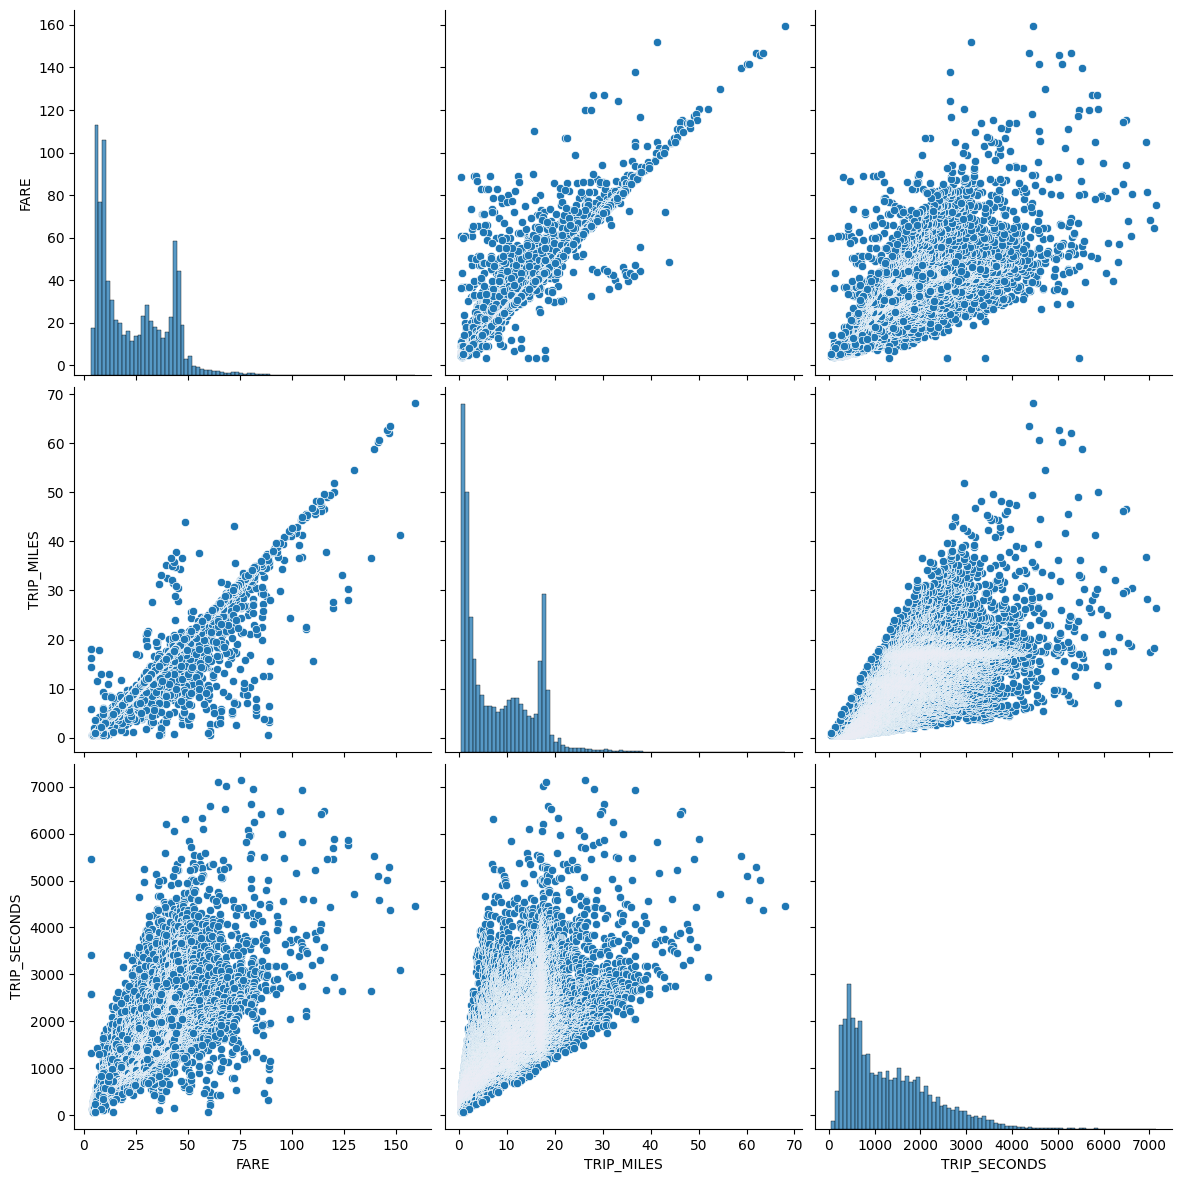

In [17]:
#view pair plot
sns.pairplot(training_df, x_vars=['FARE','TRIP_MILES', 'TRIP_SECONDS'], y_vars=['FARE','TRIP_MILES', 'TRIP_SECONDS'], height=4, aspect=1, kind='scatter')

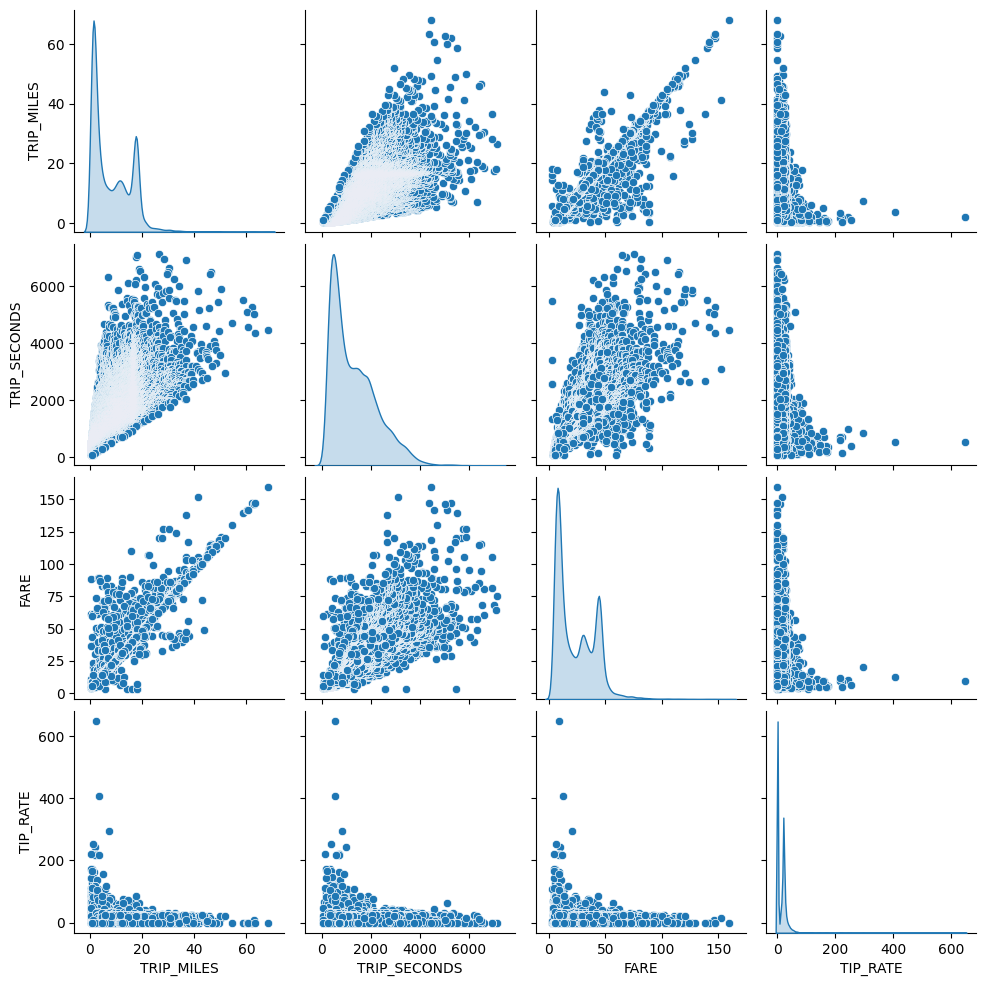

In [22]:
#or
sns.pairplot(training_df,diag_kind='kde')
plt.show()

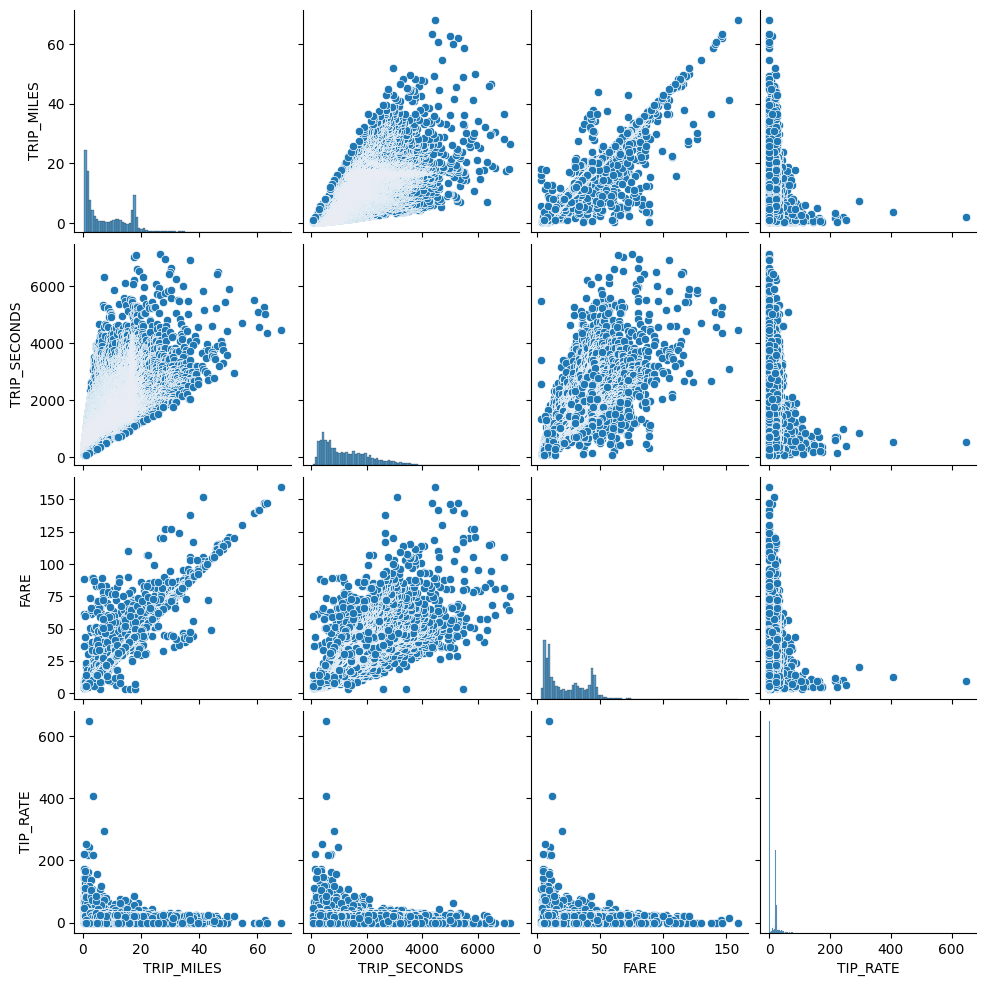

In [23]:
sns.pairplot(training_df)
plt.show()

# Part 3 - Train Model


# Define functions to view model information

To help visualize the results of each training run you will generate two plots at the end of each experiment:

>A scatter plot of the features vs. the label with a line showing the output of the trained model

>A loss curve

Define plotting functions

In [29]:
def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")


SUCCESS: defining plotting functions complete.


# Define functions to build and train a model

The code you need to build and train your model is in the Define ML functions code cell. If you would like to explore this code, expand the code cell and take a look.

Instructions

>Run the Define ML functions code cell.

In [30]:
def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = keras.Input(shape=(num_features,))
  outputs = keras.layers.Dense(units=1)(inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  # input_x = df.iloc[:,1:3].values
  # df[feature]
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, df, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.
